<a href="https://colab.research.google.com/github/mahmoud97khaled/Bike-Share-Project-Data-anlysis-/blob/main/MELBOURNE_HOUSE_PRICES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing libraries 

import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/Melbourne_housing_FULL.csv')
# Displaying first five records of datset

df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [3]:
# Displays dimension of the dataset i.e no. of rows and columns

df.shape

(34857, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [5]:
# Describe the dataset

df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [6]:
num_col = df.select_dtypes(include=np.number).columns
print("Numerical columns: \n",num_col)

cat_col = df.select_dtypes(exclude=np.number).columns
print("Categorical columns: \n",cat_col)

Numerical columns: 
 Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
       'Propertycount'],
      dtype='object')
Categorical columns: 
 Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')


# 4.Data Pre-processing

Cleaning / Filling Missing Data
Pandas provides various methods for cleaning the missing values.
The fillna function can “fill in” NA values with non-null data in a couple of ways



*   Replace NaN with a Scalar Value

*   Replacing "NaN" with "0".

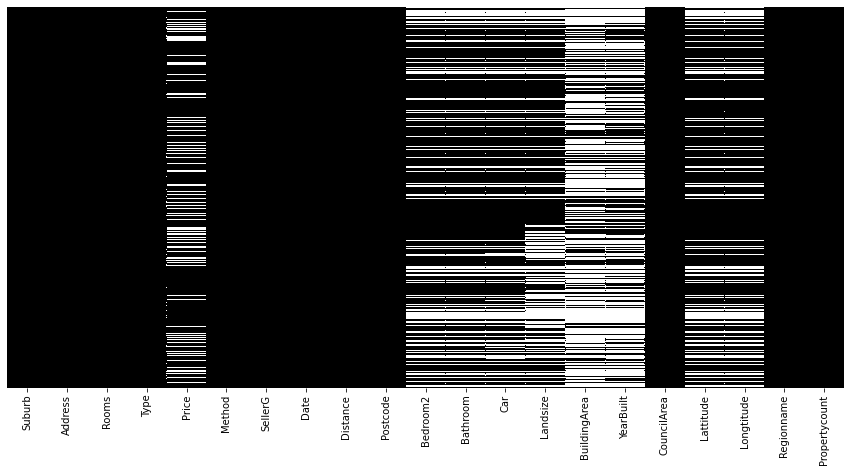

In [7]:
# Visualize missing values
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.2)
sns.heatmap(df.isnull(),yticklabels = False, cbar = False, cmap = 'Greys_r')
plt.show()

In [8]:

df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


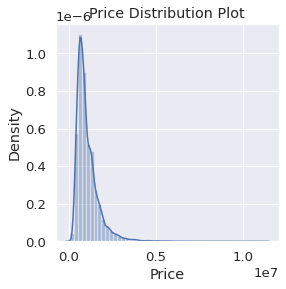

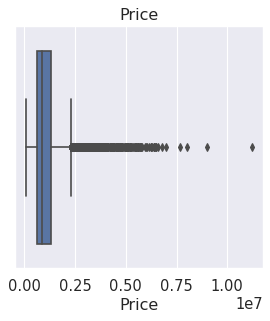

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(4,4))
plt.title('Price Distribution Plot')
sns.distplot(df['Price'])

# Let's check the distribution of y variable
plt.figure(figsize=(4,4), dpi= 80)
sns.boxplot(df['Price'])
plt.title('Price')
plt.show()

# Removing Null values

In [10]:
#separate the numeric columns from the categorical columns

# select numerical columns
data_numeric = df.select_dtypes(include=[np.number])
numeric_cols = data_numeric.columns.values
# select non-numeric columns
data_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = data_non_numeric.columns.values

In [11]:
data_numeric.head()


,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,2,NaN,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,-37.8014,144.9958,4019.0
1,2,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,-37.7996,144.9984,4019.0
2,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,4019.0
3,3,NaN,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,-37.8114,145.0116,4019.0
4,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,4019.0


In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_numeric = pd.DataFrame(scaler.fit_transform(data_numeric), columns = data_numeric.columns)
data_numeric.head()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,0.066667,NaN,0.051975,0.068507,0.066667,0.083333,0.038462,0.000291,NaN,NaN,0.486148,0.518802,0.182501
1,0.066667,0.125506,0.051975,0.068507,0.066667,0.083333,0.038462,0.000466,NaN,NaN,0.488397,0.521160,0.182501
2,0.066667,0.085470,0.051975,0.068507,0.066667,0.083333,0.000000,0.000360,0.001775,0.773626,0.478025,0.516625,0.182501
3,0.133333,NaN,0.051975,0.068507,0.100000,0.166667,0.038462,0.000000,NaN,NaN,0.473651,0.533132,0.182501
4,0.133333,0.124157,0.051975,0.068507,0.100000,0.166667,0.000000,0.000309,0.003370,0.773626,0.476276,0.517532,0.182501


In [13]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
data_numeric = pd.DataFrame(imputer.fit_transform(data_numeric),columns = data_numeric.columns)

In [14]:
data_numeric.isna().any()

Rooms            False
Price            False
Distance         False
Postcode         False
Bedroom2         False
Bathroom         False
Car              False
Landsize         False
BuildingArea     False
YearBuilt        False
Lattitude        False
Longtitude       False
Propertycount    False
dtype: bool

# Removing Outliers

In [15]:
# Importing
import sklearn
import pandas as pd


''' Detection '''
# IQR
Q1 = np.percentile(data_numeric ['Price'], 25, interpolation = 'midpoint')

Q3 = np.percentile(data_numeric ['Price'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
print (IQR)
print("Old Shape: ", data_numeric.shape)

# Upper bound
upper = np.where(data_numeric['Price'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(data_numeric['Price'] <= (Q1-1.5*IQR))

''' Removing the Outliers '''
data_numeric.drop(upper[0], inplace = True)
data_numeric.drop(lower[0], inplace = True)

print("New Shape: ", data_numeric.shape)


0.060728744939271245
Old Shape:  (34857, 13)
New Shape:  (33118, 13)


In [16]:
data_numeric.head()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,0.066667,0.061071,0.051975,0.068507,0.066667,0.083333,0.038462,0.000291,0.001761,0.828571,0.486148,0.518802,0.182501
1,0.066667,0.125506,0.051975,0.068507,0.066667,0.083333,0.038462,0.000466,0.002031,0.785714,0.488397,0.521160,0.182501
2,0.066667,0.085470,0.051975,0.068507,0.066667,0.083333,0.000000,0.000360,0.001775,0.773626,0.478025,0.516625,0.182501
3,0.133333,0.093351,0.051975,0.068507,0.100000,0.166667,0.038462,0.000000,0.002431,0.831429,0.473651,0.533132,0.182501
4,0.133333,0.124157,0.051975,0.068507,0.100000,0.166667,0.000000,0.000309,0.003370,0.773626,0.476276,0.517532,0.182501


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


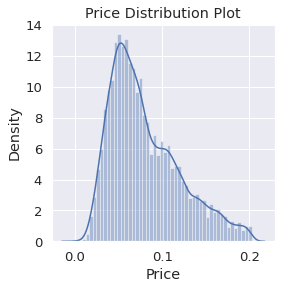

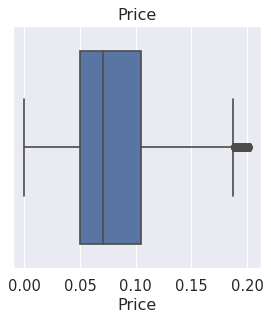

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(4,4))
plt.title('Price Distribution Plot')
sns.distplot(data_numeric['Price'])

# Let's check the distribution of y variable
plt.figure(figsize=(4,4), dpi= 80)
sns.boxplot(data_numeric['Price'])
plt.title('Price')
plt.show()

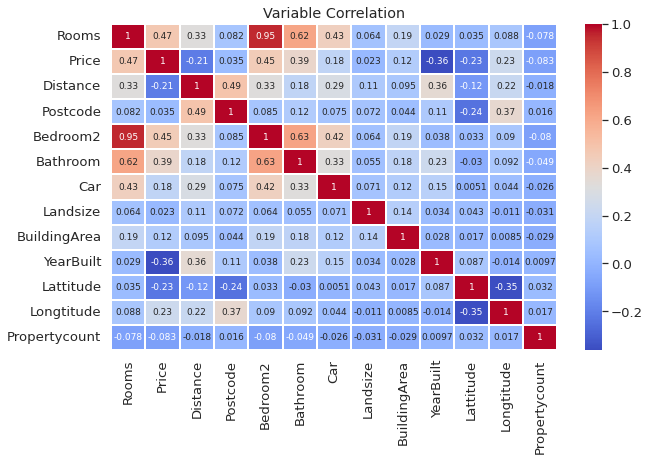

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(data_numeric.corr(),cmap = 'coolwarm',linewidth = 1,annot= True, annot_kws={"size": 9})
plt.title('Variable Correlation')
plt.show()

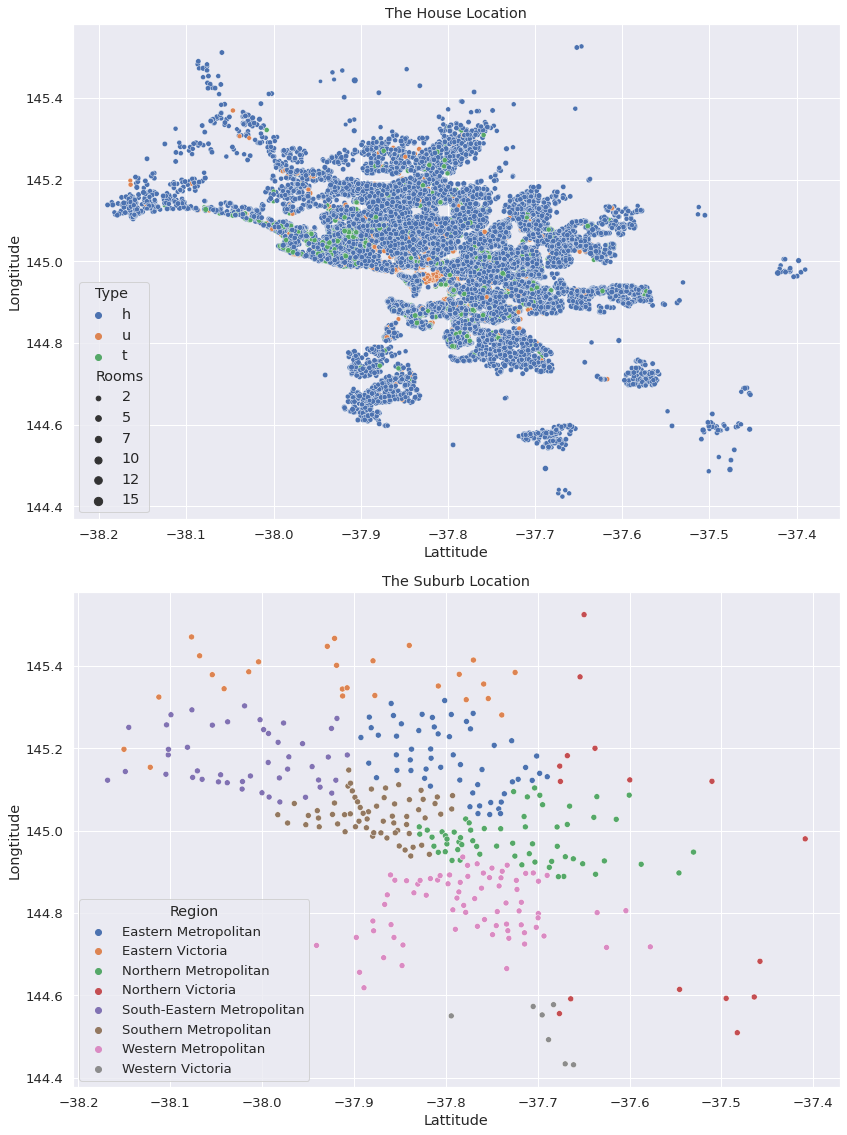

In [19]:
dl = df[['Regionname', 'Suburb', 'Price', 'Lattitude', 'Longtitude']].groupby(by=['Regionname', 'Suburb']).mean()
dl_region = [i for i, j in dl.index]
dl_suburb = [j for i, j in dl.index]

dl['Region'] = dl_region
dl['Suburb'] = dl_suburb
dl = dl.reset_index(drop=True)

fig, ax = plt.subplots(2, 1, figsize=(12, 16))
sns.scatterplot(data=df, x='Lattitude', y='Longtitude', hue='Type', size='Rooms', ax=ax[0])
ax[0].set_title('The House Location')
sns.scatterplot(data=dl, x='Lattitude', y='Longtitude', hue='Region', ax=ax[1])
ax[1].set_title('The Suburb Location')
plt.tight_layout()

In [20]:
# Splitting data